In [1]:
#Jul 7, 2025
#Author : Diksha Aswal

#Experiment No.1

#random allocation of circle on a shaeet without overlapping
#distribution of circles (Normal Distribution)
## mean diameter = 50
## std of diameter = 10
## lower limit on diameter = 40
## higher limit on diameter = 60

# dimension of the sheet
# 5000 X 5000

##### Simulate the packing of circles with diameters drawn from a normal distribution, within a fixed-size 2D sheet, ensuring no overlap between any two circles.

In [3]:
#Import Libraries
from graphing_tools import plot_circles, plot_distribution # Custom visualization functions
from utility_functions import calculate_packing_efficiency # Custom metric function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
from collections import defaultdict

In [27]:
# --- Simulation Parameters ---


# Sheet dimensions
sheet_width = 5000
sheet_height = 5000
# Circle Distribution parameters
mean_diameter = 50
std_diameter = 10
min_diameter = 40
max_diameter = 60

population_size = 1000000          # Number of diameters to generate
total_skips = 100                  # Number of failed full tries before exiting
max_attempts = 25000000            # Max attempts per circle before skipping



allocated_circles = []             # List of successfully placed circles
attempts_dict = defaultdict(int)   # Tracks how many attempts it took to place each circle

In [ ]:
# Function to sample from a truncated normal distribution


# Helper Function: Generate initial diameters from normal distribution (no truncation yet)
def generate_diameters(n):
    np.random.seed(42)
    return np.random.normal(loc=mean_diameter, scale=std_diameter, size=n).astype(int)

# Helper Function: Check if a new circle overlaps with any existing circle
def is_overlapping(new_circle, existing_circles):
    x1, y1, r1 = new_circle
    for x2, y2, r2 in existing_circles:
        dist_sq = (x1 - x2)**2 + (y1 - y2)**2
        min_dist = (r1 + r2)**2
        if dist_sq < min_dist:
            return True
    return False
    
# Main Function: Place Circles on the Sheet 
def place_circles(truncated_diameters):
    """
    Attempts to place non-overlapping circles randomly on the sheet using
    diameters from a truncated distribution.
    """
  np.random.seed(42)
  total_tries = 0
  while total_tries < total_skips:
    diameter = np.random.choice(truncated_diameters)
    # print(diameter)
    attempts = 0

    while attempts < max_attempts:
      radius = diameter / 2
      x = int(np.random.uniform(radius, sheet_width - radius))
      y = int(np.random.uniform(radius, sheet_height - radius))
      new_circle = (x, y, radius)
      if not is_overlapping(new_circle, allocated_circles):
          allocated_circles.append(new_circle)
          attempts_dict[attempts] += 1
          print(len(allocated_circles))
          break

      attempts += 1
    if attempts == max_attempts:
      total_tries += 1
      print(total_tries)

    # --- Save allocated_circles to a CSV file ---
    circle_df = pd.DataFrame(allocated_circles, columns=['x', 'y', 'radius'])
    circle_df.to_csv('allocated_circles_Experiment1.csv', index=False)

    # --- Save attempts_dict to a CSV file ---
    attempts_df = pd.DataFrame(list(attempts_dict.items()), columns=['attempts', 'count'])
    attempts_df.sort_values(by='attempts', inplace=True)
    attempts_df.to_csv('attempts_distribution_Experiment1.csv', index=False)



In [ ]:
raw_diameters = generate_diameters(population_size)
truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]

place_circles(truncated_diameters)


In [ ]:
# I stopped the simulation after certain point as this computation was taking too long for the first experiment.

In [7]:
allocated_circles_1 = pd.read_csv('allocated_circles_Experiment1.csv')


In [9]:
len(allocated_circles_1)

6366

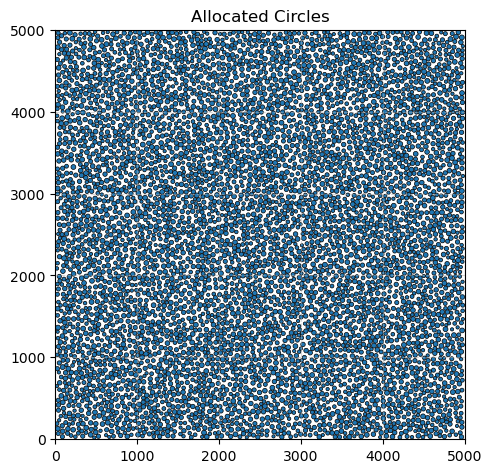

In [11]:
 plot_circles(5000, 5000, allocated_circles_1)

In [12]:
packing_efficiency = calculate_packing_efficiency(5000, 5000, allocated_circles_1)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")

Packing Efficiency: 0.5047 (50.47%)


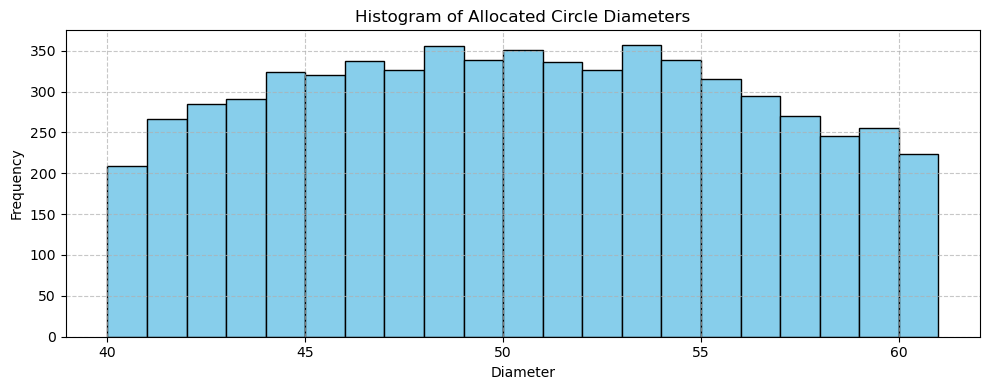

In [13]:
plot_distribution(40, 62, allocated_circles_1)

##### Though first experiment we were able to get the running code for the simulations. A 5000x5000 canvas is memory-intensive, especially with many circle placement attempts and overlap checks.